In [1]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sys
sys.path.insert(0, '../utils')
import data_utils

In [3]:
df_test = data_utils.json_to_df('../data/raw/test.json')

,head.id,head.type,head.word,relation,sentence,tail.id,tail.type,tail.word
0,/guid/9202a8c04000641f8000000000078105,"/base/jewlib/topic,/common/topic,/user/narphor...",Arthur Schnitzler,/people/person/place_of_birth,"The Little Comedy , '' a mannered operetta bas...",/guid/9202a8c04000641f800000000006bea9,"/location/administrative_division,/base/arthis...",Vienna
1,/guid/9202a8c04000641f800000000006daf1,"/common/topic,/user/narphorium/people/topic,/u...",Roberto Calvi,/people/person/nationality,A court in Rome acquitted five people accused ...,/guid/9202a8c04000641f800000000001de10,"/location/dated_location,/aviation/aircraft_ow...",Italy
2,/guid/9202a8c04000641f8000000003147149,"/user/narphorium/people/nndb_person,/music/art...",Johnny Rivers,/people/person/place_lived,There were also performers who were born in Lo...,/guid/9202a8c04000641f8000000000024ba1,"/location/administrative_division,/common/topi...",Louisiana
3,/guid/9202a8c04000641f800000000002e90b,"/base/coloniesandempire/topic,/meteorology/cyc...",Philippines,/location/location/contains,"When Julian Resuello , the mayor of San Carlos...",/guid/9202a8c04000641f8000000000687b53,"/location/statistical_region,/location/citytow...",San Carlos City
4,/guid/9202a8c04000641f800000000018820d,"/base/scotland/topic,/people/person,/base/todo...",Alex Salmond,/people/person/nationality,"A3 Concern Raised by Libya Deal Alex Salmond ,...",/guid/9202a8c04000641f8000000000035837,"/base/popstra/topic,/user/skud/flags/topic,/bi...",Scotland


,head.id,head.type,head.word,relation,sentence,tail.id,tail.type,tail.word
count,172448,172448,172448,172448,172448,172448,172448,172448
unique,16706,11113,16706,32,45746,16706,11113,16706
top,/guid/9202a8c04000641f80000000083ff842,"/common/topic,/people/ethnicity",American,NA,He is survived by his loving wife of 68 years ...,/guid/9202a8c04000641f80000000083ff842,"/common/topic,/people/ethnicity",American
freq,3989,4141,3989,166004,180,3989,4141,3989


Relations in alphabetical order:

{'/base/locations/countries/states_provinces_within': 1,
 '/business/company/advisors': 8,
 '/business/company/founders': 95,
 '/business/company/major_shareholders': 46,
 '/business/company/place_founded': 20,
 '/business/company_advisor/companies_advised': 8,
 '/business/person/company': 302,
 '/film/film/featured_film_locations': 2,
 '/film/film_location/featured_in_films': 2,
 '/location/administrative_division/country': 424,
 '/location/br_state/capital': 2,
 '/location/country/administrative_divisions': 424,
 '/location/country/capital': 553,
 '/location/country/languages_spoken': 3,
 '/location/location/contains': 2793,
 '/location/neighborhood/neighborhood_of': 68,
 '/location/province/capital': 11,
 '/location/us_county/county_seat': 23,
 '/location/us_state/capital': 39,
 '/people/deceased_person/place_of_burial': 9,
 '/people/deceased_person/place_of_death': 68,
 '/people/ethnicity/geographic_distribution': 136,
 '/people/person/children': 3

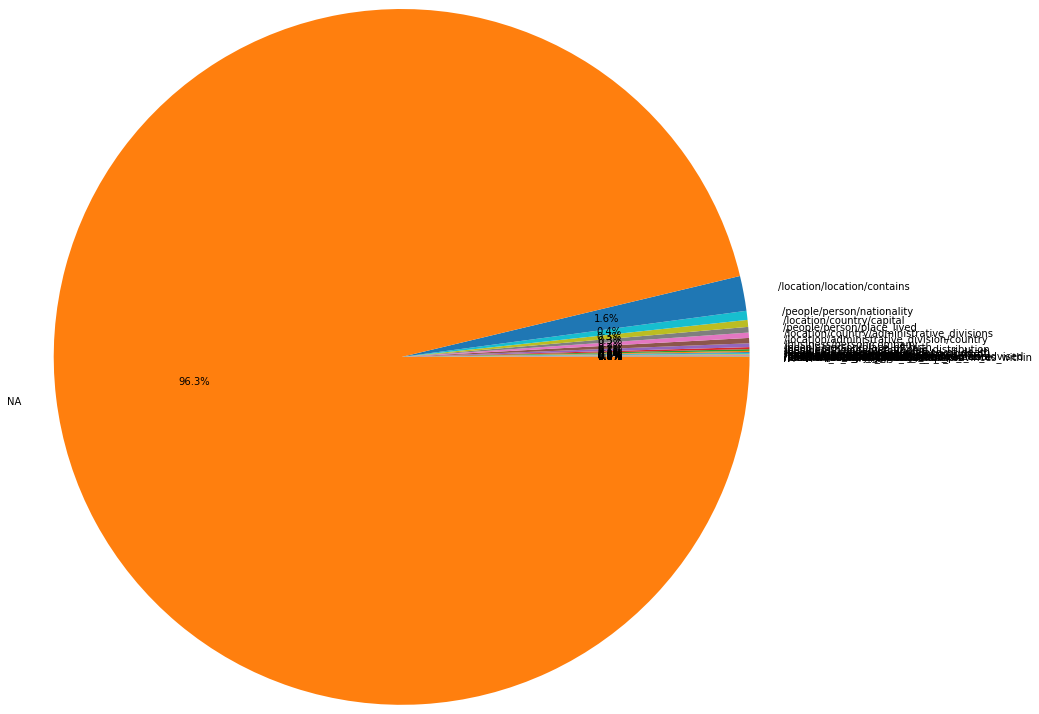

Relation distribution without NA:



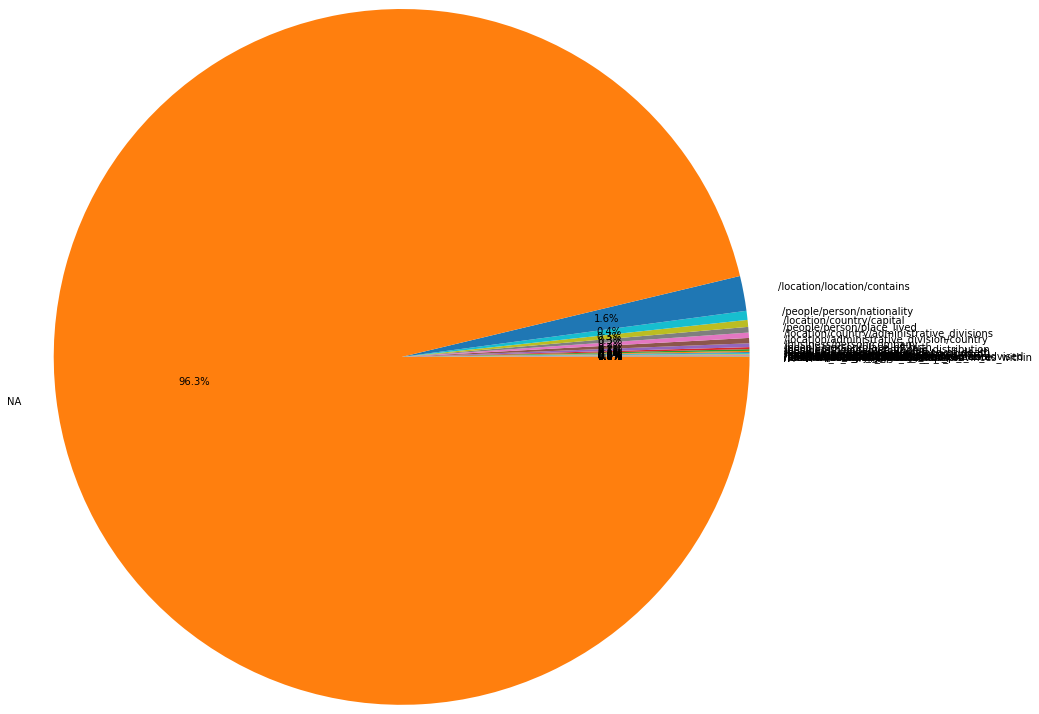

Examples:

sentence: Over the course of my reign and certainly since I first visited Jamestown in 1957 , my country has become a much more diverse society , just as the commonwealth of Virginia and the whole United States of America have also undergone a major social change , '' the queen said . ''
head.word: United States of America
relation: /base/locations/countries/states_provinces_within
tail.word: Virginia

sentence: Other films include '' The Unknown Woman '' -LRB- '' La Sconosciuta '' -RRB- , a thriller about a Ukrainian immigrant to Italy directed by Giuseppe Tornatore -LRB- '' Cinema Paradiso '' -RRB- ; Angelo Longoni 's biopic '' Caravaggio , '' photographed by the great Vittorio Storaro and starring Alessio Boni , who played the younger brother in '' The Best of Youth '' ; and '' Primo Levi 's Journey '' -LRB- '' La Strada di Levi '' -RRB- , a documentary that retraces the tortuous route Levi had to take to return home from Auschwitz in 1945 .
head.word: Best of Youth
relat

In [4]:
df_test.head()
df_test.describe()
data_utils.analyze_data_set(df_test)